# 1

In [4]:
# Primero importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Leemos el archivo de datos
datos = np.loadtxt('velocidades.txt')
tiempo = datos[:, 0]      # Primera columna: tiempo
velocidad = datos[:, 1]   # Segunda columna: velocidad

# Mostramos los primeros datos para verificar
print("Primeros 5 datos:")
for i in range(5):
    print(f"Tiempo: {tiempo[i]} s, Velocidad: {velocidad[i]} m/s")

Primeros 5 datos:
Tiempo: 0.0 s, Velocidad: 0.0 m/s
Tiempo: 1.0 s, Velocidad: 0.069478 m/s
Tiempo: 2.0 s, Velocidad: 0.137694 m/s
Tiempo: 3.0 s, Velocidad: 0.204332 m/s
Tiempo: 4.0 s, Velocidad: 0.269083 m/s


In [5]:
# a) Calculamos la distancia con la regla del trapecio
distancia = np.zeros(len(tiempo))  # Creamos un array de ceros para la distancia

# Empezamos desde i=1 porque en i=0 la distancia es 0
for i in range(1, len(tiempo)):
    dt = tiempo[i] - tiempo[i-1]  # Diferencia de tiempo
    # Área del trapecio = base * (altura1 + altura2)/2
    area = dt * (velocidad[i] + velocidad[i-1]) / 2
    # La distancia acumulada es la anterior más el área nueva
    distancia[i] = distancia[i-1] + area

print(f"Distancia total recorrida: {distancia[-1]:.2f} metros")

Distancia total recorrida: 8.22 metros


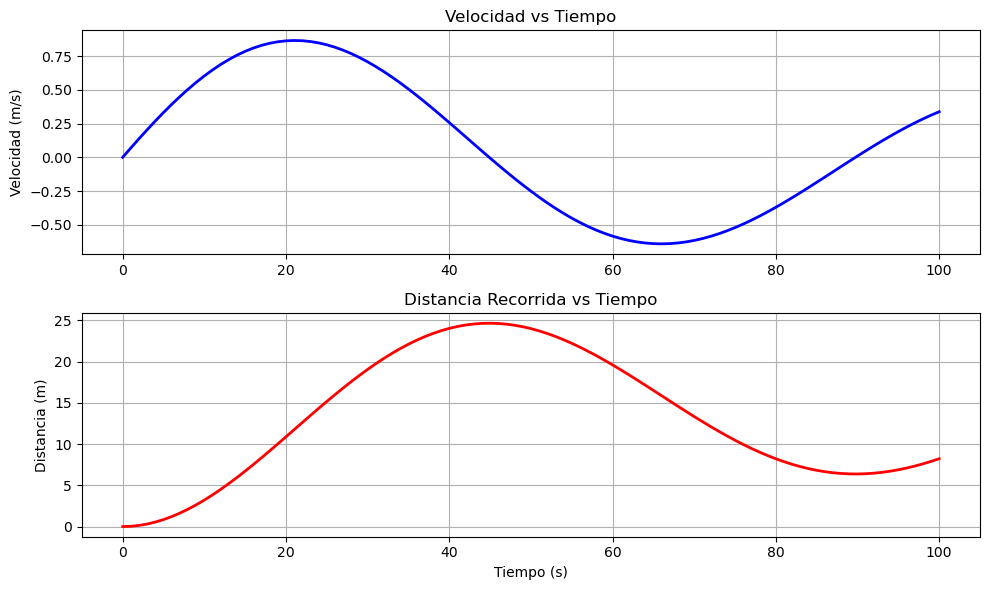

In [6]:
# b) Creamos la gráfica
plt.figure(figsize=(10, 6))

# Gráfica de velocidad (eje izquierdo)
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
plt.plot(tiempo, velocidad, 'b-', linewidth=2)
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad vs Tiempo')
plt.grid(True)

# Gráfica de distancia (eje izquierdo)
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
plt.plot(tiempo, distancia, 'r-', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.title('Distancia Recorrida vs Tiempo')
plt.grid(True)

plt.tight_layout()
plt.show()

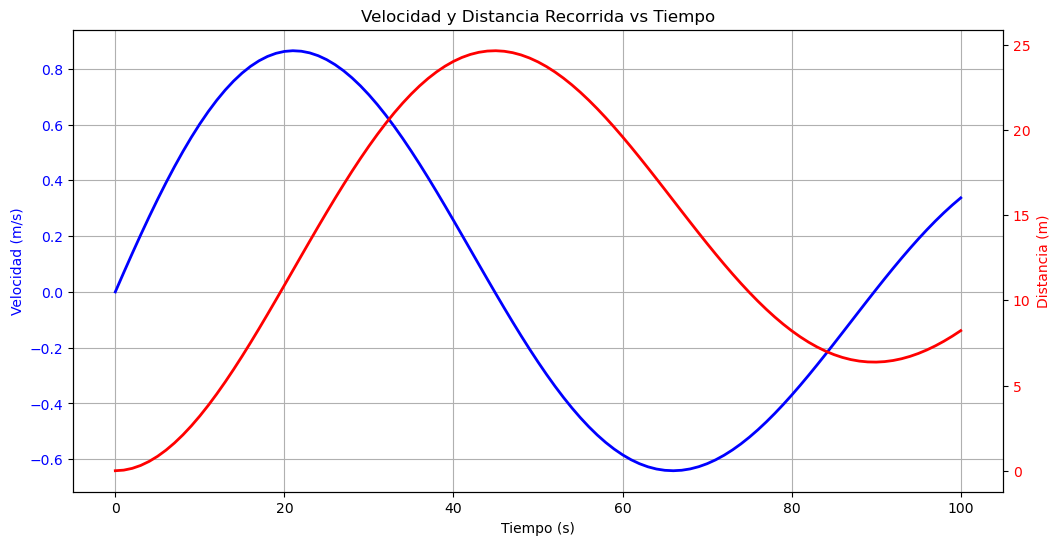

In [7]:
# Versión alternativa: ambas curvas en la misma gráfica
plt.figure(figsize=(12, 6))

# Crear la gráfica de velocidad
plt.plot(tiempo, velocidad, 'b-', linewidth=2, label='Velocidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)', color='b')
plt.tick_params(axis='y', labelcolor='b')
plt.grid(True)

# Crear un segundo eje Y para la distancia
plt.twinx()
plt.plot(tiempo, distancia, 'r-', linewidth=2, label='Distancia')
plt.ylabel('Distancia (m)', color='r')
plt.tick_params(axis='y', labelcolor='r')

plt.title('Velocidad y Distancia Recorrida vs Tiempo')
plt.show()

In [8]:
# Mostramos algunos resultados importantes
print("=" * 50)
print("RESULTADOS FINALES")
print("=" * 50)
print(f"Tiempo total: {tiempo[-1]} segundos")
print(f"Distancia total: {distancia[-1]:.4f} metros")
print(f"Velocidad máxima: {np.max(velocidad):.4f} m/s")
print(f"Velocidad promedio: {np.mean(velocidad):.4f} m/s")

print("\nPrimeros 10 valores calculados:")
print("T(s)\tV(m/s)\tDist(m)")
for i in range(10):
    print(f"{tiempo[i]}\t{velocidad[i]:.3f}\t{distancia[i]:.3f}")

RESULTADOS FINALES
Tiempo total: 100.0 segundos
Distancia total: 8.2189 metros
Velocidad máxima: 0.8649 m/s
Velocidad promedio: 0.0830 m/s

Primeros 10 valores calculados:
T(s)	V(m/s)	Dist(m)
0.0	0.000	0.000
1.0	0.069	0.035
2.0	0.138	0.138
3.0	0.204	0.309
4.0	0.269	0.546
5.0	0.332	0.846
6.0	0.392	1.208
7.0	0.449	1.629
8.0	0.504	2.105
9.0	0.555	2.634


# 2

In [9]:
# Celda 1: Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Para comparar nuestros resultados

In [10]:
# Celda 2: Función J(m,x) usando la regla de Simpson
def J(m, x, N=1000):
    """
    Calcula la función de Bessel J_m(x) usando la regla de Simpson
    """
    # Definir el rango de theta de 0 a pi
    theta = np.linspace(0, np.pi, N)
    
    # Calcular la función a integrar: cos(m*theta - x*sin(theta))
    f = np.cos(m * theta - x * np.sin(theta))
    
    # Aplicar la regla de Simpson
    h = np.pi / (N - 1)  # Tamaño del paso
    
    # Pesos de Simpson: 1,4,2,4,2,...,4,1
    weights = np.ones(N)
    weights[1:-1:2] = 4  # Índices impares
    weights[2:-1:2] = 2  # Índices pares
    
    # Calcular la integral
    integral = (h / 3) * np.sum(weights * f)
    
    # Función de Bessel: J_m(x) = (1/pi) * integral
    return integral / np.pi

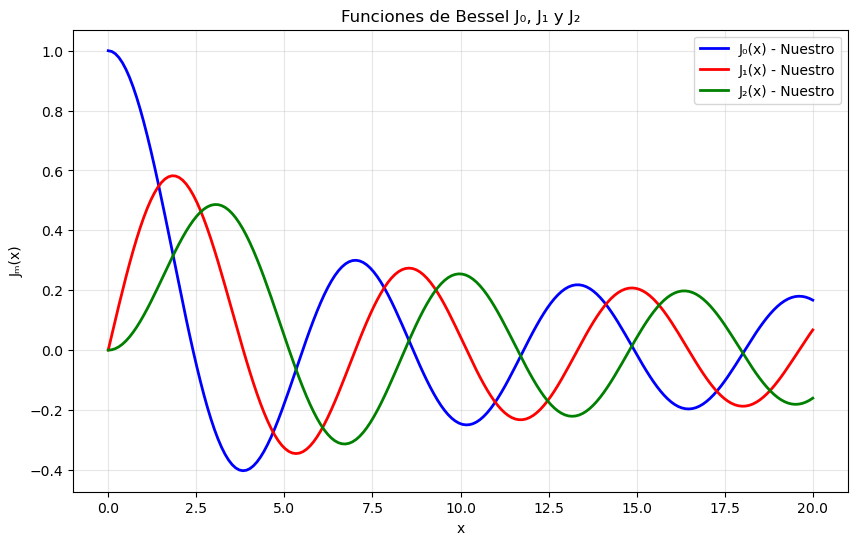

In [11]:
# Celda 3: Graficar J0, J1 y J2
# Crear valores de x desde 0 hasta 20
x = np.linspace(0, 20, 200)

# Calcular las funciones de Bessel
J0_ours = [J(0, xi) for xi in x]
J1_ours = [J(1, xi) for xi in x] 
J2_ours = [J(2, xi) for xi in x]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, J0_ours, 'b-', linewidth=2, label='J₀(x) - Nuestro')
plt.plot(x, J1_ours, 'r-', linewidth=2, label='J₁(x) - Nuestro')
plt.plot(x, J2_ours, 'g-', linewidth=2, label='J₂(x) - Nuestro')

plt.xlabel('x')
plt.ylabel('Jₘ(x)')
plt.title('Funciones de Bessel J₀, J₁ y J₂')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

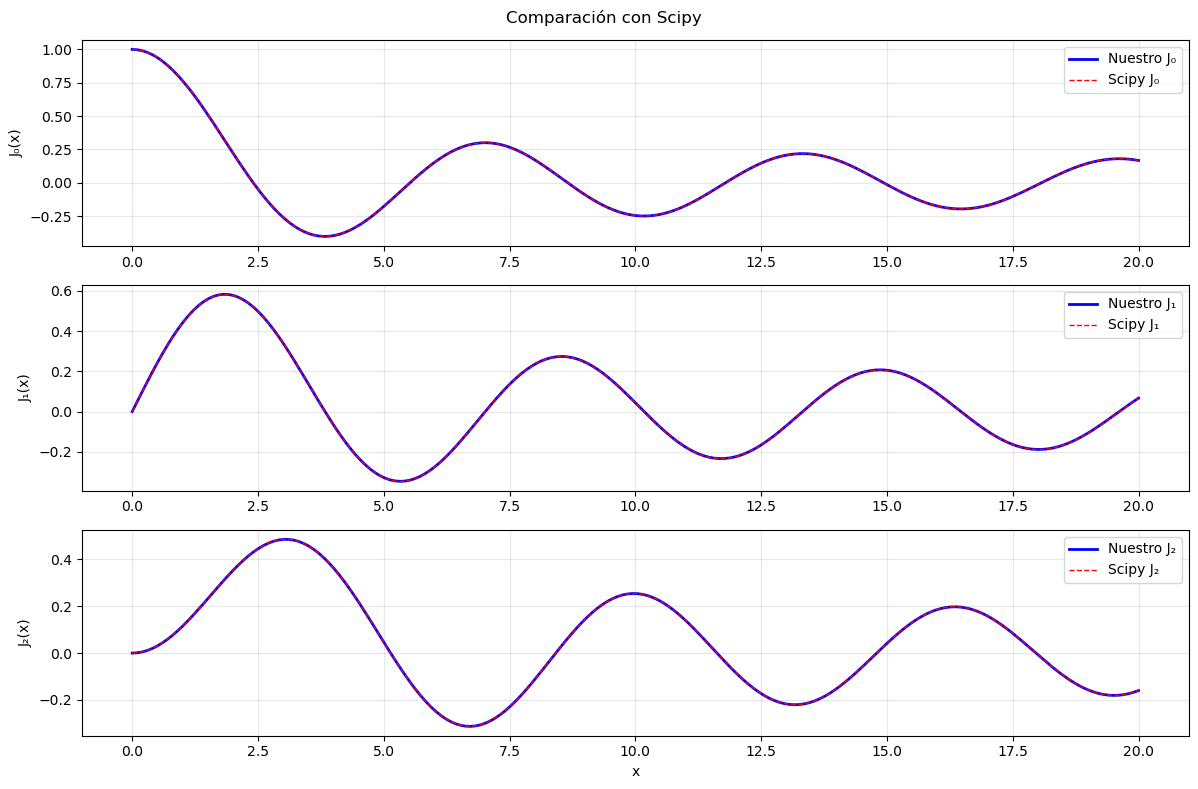

Diferencia máxima J0: 3.34e-04
Diferencia máxima J1: 3.34e-04
Diferencia máxima J2: 3.34e-04


In [12]:
# Celda 4: Comparar con scipy
# Calcular con scipy
J0_scipy = jv(0, x)
J1_scipy = jv(1, x)
J2_scipy = jv(2, x)

# Graficar comparación
plt.figure(figsize=(12, 8))

# J0
plt.subplot(3, 1, 1)
plt.plot(x, J0_ours, 'b-', linewidth=2, label='Nuestro J₀')
plt.plot(x, J0_scipy, 'r--', linewidth=1, label='Scipy J₀')
plt.ylabel('J₀(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# J1
plt.subplot(3, 1, 2)
plt.plot(x, J1_ours, 'b-', linewidth=2, label='Nuestro J₁')
plt.plot(x, J1_scipy, 'r--', linewidth=1, label='Scipy J₁')
plt.ylabel('J₁(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# J2
plt.subplot(3, 1, 3)
plt.plot(x, J2_ours, 'b-', linewidth=2, label='Nuestro J₂')
plt.plot(x, J2_scipy, 'r--', linewidth=1, label='Scipy J₂')
plt.xlabel('x')
plt.ylabel('J₂(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Comparación con Scipy')
plt.tight_layout()
plt.show()

# Calcular diferencias
diff_J0 = np.max(np.abs(J0_ours - J0_scipy))
diff_J1 = np.max(np.abs(J1_ours - J1_scipy))
diff_J2 = np.max(np.abs(J2_ours - J2_scipy))

print(f"Diferencia máxima J0: {diff_J0:.2e}")
print(f"Diferencia máxima J1: {diff_J1:.2e}")
print(f"Diferencia máxima J2: {diff_J2:.2e}")

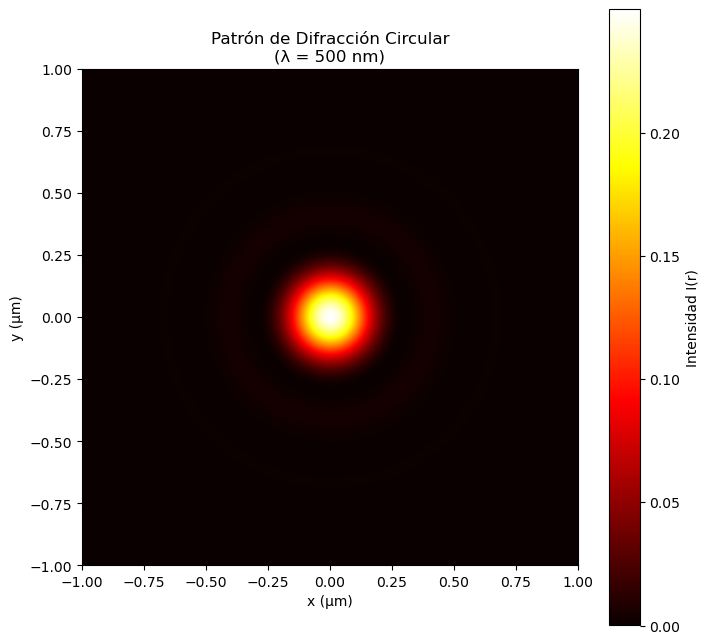

In [13]:
# Celda 5: Gráfica de densidad del patrón de difracción
# Parámetros
lambda_ = 500e-9  # 500 nm en metros
k = 2 * np.pi / lambda_

# Crear una malla de puntos en el plano focal
size = 1e-6  # 1 μm
points = 500
x_range = np.linspace(-size, size, points)
y_range = np.linspace(-size, size, points)
X, Y = np.meshgrid(x_range, y_range)

# Calcular r (distancia desde el centro)
r = np.sqrt(X**2 + Y**2)

# Calcular la intensidad I(r)
# Para evitar división por cero en r=0, usamos el hint
I = np.zeros_like(r)

# Para r=0 (o muy cercano a cero), usar el límite
mask_zero = r < 1e-10  # Valores muy cercanos a cero
mask_nonzero = ~mask_zero

# Para r=0: lim_{x→0} J1(x)/x = 1/2
I[mask_zero] = (0.5)**2

# Para r>0: I(r) = [J1(kr)/(kr)]^2
kr_nonzero = k * r[mask_nonzero]
I[mask_nonzero] = (jv(1, kr_nonzero) / kr_nonzero)**2

# Crear la gráfica de densidad
plt.figure(figsize=(8, 8))
plt.imshow(I, extent=[-size*1e6, size*1e6, -size*1e6, size*1e6], 
           cmap='hot', origin='lower')
plt.colorbar(label='Intensidad I(r)')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.title('Patrón de Difracción Circular\n(λ = 500 nm)')
plt.show()

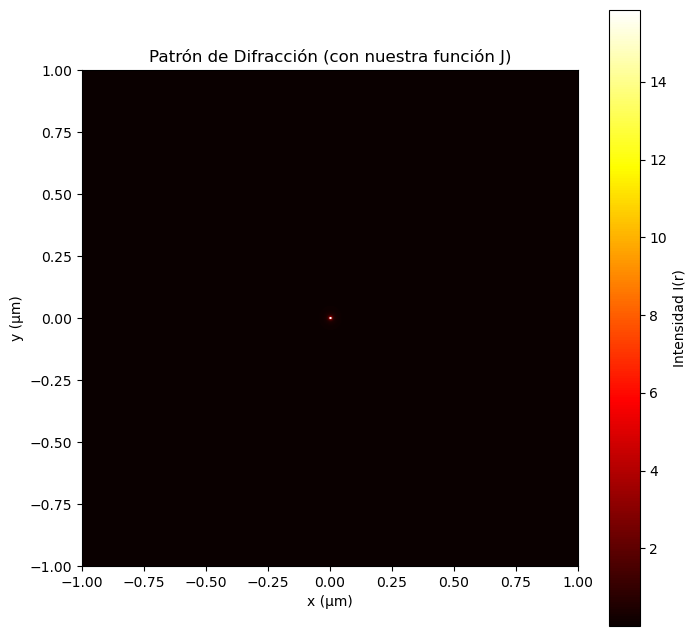

In [14]:
# Celda 6: Versión alternativa usando nuestra función J(m,x)
# (Esta celda puede tomar más tiempo en ejecutarse)

# Para puntos donde r no es cero
I_ours = np.zeros_like(r)

# Aplicar la misma lógica pero con nuestra función
mask_zero = r < 1e-10
mask_nonzero = ~mask_zero

I_ours[mask_zero] = (0.5)**2

# Calcular solo algunos puntos para no demorar demasiado
# (opcional - para demostración)
kr_nonzero = k * r[mask_nonzero]
I_temp = np.zeros_like(kr_nonzero)

# Calcular en batches para no sobrecargar
batch_size = 1000
for i in range(0, len(kr_nonzero), batch_size):
    end_idx = min(i + batch_size, len(kr_nonzero))
    batch_kr = kr_nonzero[i:end_idx]
    I_temp[i:end_idx] = (J(1, batch_kr) / batch_kr)**2

I_ours[mask_nonzero] = I_temp

# Graficar
plt.figure(figsize=(8, 8))
plt.imshow(I_ours, extent=[-size*1e6, size*1e6, -size*1e6, size*1e6], 
           cmap='hot', origin='lower')
plt.colorbar(label='Intensidad I(r)')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.title('Patrón de Difracción (con nuestra función J)')
plt.show()

# 3

In [15]:
# Celda 1: Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Parte a) Demostración matemática:

De la conservación de energía:
E = (1/2)m(dx/dt)² + V(x) = V(a)

Despejando dx/dt:
(1/2)m(dx/dt)² = V(a) - V(x)
dx/dt = -√$2/m * (V(a) - V(x))$  (signo negativo porque va hacia el origen)

Separando variables e integrando:
∫₀^{T/4} dt = -√(m/2) ∫ₐ⁰ dx/√[V(a) - V(x)]

T/4 = √(m/2) ∫₀ᵃ dx/√[V(a) - V(x)]

Por lo tanto:
T = √(8m) ∫₀ᵃ dx/√[V(a) - V(x)]

In [23]:
# Celda 3: Función para calcular el periodo usando Cuadratura Gaussiana
def periodo_oscilador(a, m=1, N=20):
    """
    Calcula el periodo de un oscilador con potencial V(x) = x^4
    usando cuadratura gaussiana con N puntos
    """
    # Definir el potencial V(x) = x^4
    def V(x):
        return x**4
    
    # Definir la función a integrar: 1/√[V(a) - V(x)]
    def integrando(x):
        # Para evitar división por cero en x = a
        if abs(x - a) < 1e-12:
            return 0
        return 1 / np.sqrt(V(a) - V(x))
    
    # Obtener los puntos y pesos de Gauss-Legendre
    puntos, pesos = np.polynomial.legendre.leggauss(N)
    
    # Transformar del intervalo [-1, 1] a [0, a]
    x_transformados = 0.5 * a * (puntos + 1)
    pesos_transformados = 0.5 * a * pesos
    
    # Calcular la integral
    integral = 0
    for i in range(N):
        integral += pesos_transformados[i] * integrando(x_transformados[i])
    
    # Calcular el periodo: T = √(8m) * integral
    return np.sqrt(8 * m) * integral

In [18]:
# Celda 4: Verificar la función con algunos valores
print("Verificación de la función:")
amplitudes_prueba = [0.5, 1.0, 1.5, 2.0]
for a in amplitudes_prueba:
    T = periodo_oscilador(a)
    print(f"Amplitud a = {a:.1f} -> Periodo T = {T:.4f}")

Verificación de la función:
Amplitud a = 0.5 -> Periodo T = 7.2962
Amplitud a = 1.0 -> Periodo T = 3.6481
Amplitud a = 1.5 -> Periodo T = 2.4321
Amplitud a = 2.0 -> Periodo T = 1.8240


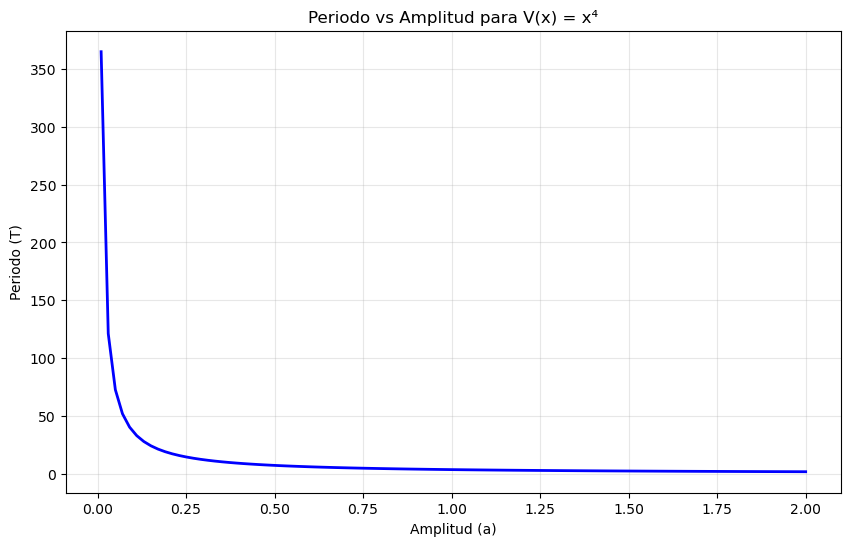

In [19]:
# Celda 5: Graficar el periodo para amplitudes de 0 a 2
# Crear array de amplitudes (evitando a=0 exactamente)
amplitudes = np.linspace(0.01, 2.0, 100)
periodos = []

# Calcular el periodo para cada amplitud
for a in amplitudes:
    T = periodo_oscilador(a)
    periodos.append(T)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(amplitudes, periodos, 'b-', linewidth=2)
plt.xlabel('Amplitud (a)')
plt.ylabel('Periodo (T)')
plt.title('Periodo vs Amplitud para V(x) = x⁴')
plt.grid(True, alpha=0.3)
plt.show()

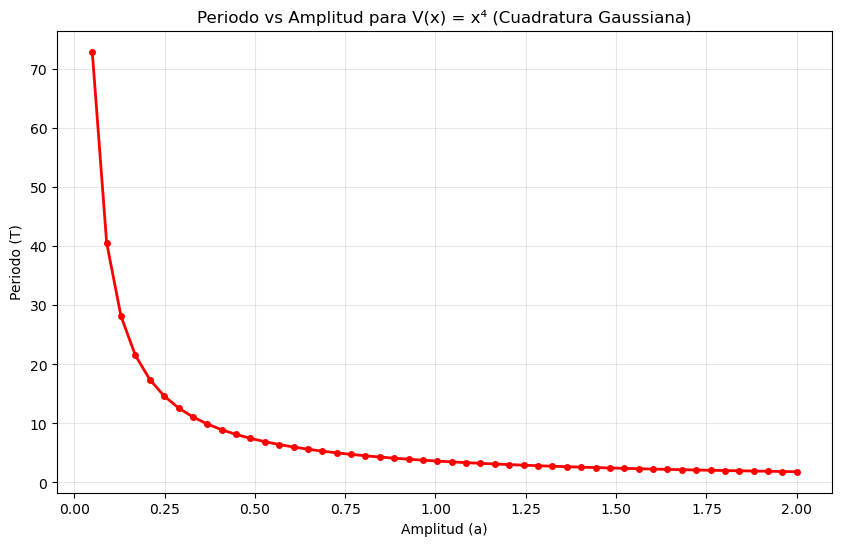

In [20]:
# Celda 6: Versión más eficiente usando vectorización
# (Para ver el mismo resultado de forma más rápida)

def periodo_vectorizado(amplitudes, m=1, N=20):
    """Versión vectorizada para calcular periodos"""
    periodos = []
    for a in amplitudes:
        # Puntos y pesos de Gauss-Legendre
        puntos, pesos = np.polynomial.legendre.leggauss(N)
        
        # Transformar puntos al intervalo [0, a]
        x_vals = 0.5 * a * (puntos + 1)
        pesos_vals = 0.5 * a * pesos
        
        # Calcular la integral
        V_a = a**4
        V_x = x_vals**4
        # Evitar división por cero
        diferencia = V_a - V_x
        diferencia[diferencia < 1e-12] = 1e-12
        
        integral = np.sum(pesos_vals / np.sqrt(diferencia))
        
        periodos.append(np.sqrt(8 * m) * integral)
    
    return np.array(periodos)

# Graficar con la versión vectorizada
amplitudes_finas = np.linspace(0.05, 2.0, 50)
periodos_finos = periodo_vectorizado(amplitudes_finas)

plt.figure(figsize=(10, 6))
plt.plot(amplitudes_finas, periodos_finos, 'ro-', linewidth=2, markersize=4)
plt.xlabel('Amplitud (a)')
plt.ylabel('Periodo (T)')
plt.title('Periodo vs Amplitud para V(x) = x⁴ (Cuadratura Gaussiana)')
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
# Celda 7: Comparar con integración numérica de scipy para verificar
def periodo_scipy(a, m=1):
    """Calcula el periodo usando integración numérica de scipy"""
    def integrando(x):
        if abs(x - a) < 1e-12:
            return 0
        return 1 / np.sqrt(a**4 - x**4)
    
    integral, error = integrate.quad(integrando, 0, a)
    return np.sqrt(8 * m) * integral

# Comparar algunos valores
print("Comparación con scipy.integrate.quad:")
print("Amplitud | Nuestra función | Scipy")
print("-" * 40)
for a in [0.5, 1.0, 1.5, 2.0]:
    T_nuestro = periodo_oscilador(a)
    T_scipy = periodo_scipy(a)
    print(f"a = {a:.1f}    | {T_nuestro:.4f}        | {T_scipy:.4f}")

Comparación con scipy.integrate.quad:
Amplitud | Nuestra función | Scipy
----------------------------------------
a = 0.5    | 7.2962        | 7.4163
a = 1.0    | 3.6481        | 3.7081
a = 1.5    | 2.4321        | 2.4721
a = 2.0    | 1.8240        | 1.8541


Explicación de los resultados:

1. **El oscilador se acelera con amplitud mayor**:
   - Aunque la partícula recorre más distancia, la fuerza F = -dV/dx = -4x³
   - A mayor amplitud, la fuerza es mucho más fuerte (depende de x³)
   - Esto hace que la partícula se mueva más rápido, compensando la mayor distancia

2. **El periodo diverge cuando a → 0**:
   - Cuando a es muy pequeño, V(a) - V(x) ≈ a⁴ - x⁴ es muy pequeño
   - El integrando 1/√[V(a) - V(x)] se hace muy grande cerca de x = a
   - Esto causa que la integral diverja cuando a → 0
   - Físicamente: cerca del mínimo, el potencial es muy "plano", 
     por lo que la partícula se mueve muy lentamente

Comparación con oscilador armónico (V(x) = x²):
- En el oscilador armónico, el periodo es CONSTANTE
- En nuestro oscilador anarmónico (V(x) = x⁴), el periodo DECRECE con la amplitud
- Esto muestra cómo la forma del potencial afecta dramáticamente la dinámica

# 4

In [24]:
# Celda 1: Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import roots_legendre

Parte a) Demostración:

Partimos de:
I(ω) = (ħ/(4π²c²)) * ω³/(e^(ħω/k_B T) - 1)


La energía total por unidad de área es:
W = ∫₀^∞ I(ω) dω = (ħ/(4π²c²)) ∫₀^∞ ω³/(e^(ħω/k_B T) - 1) dω

Hacemos el cambio de variable:
x = ħω/(k_B T)  ⇒  ω = (k_B T/ħ)x
dω = (k_B T/ħ)dx

Sustituyendo:
W = (ħ/(4π²c²)) ∫₀^∞ [(k_B T/ħ)x]³/(e^x - 1) * (k_B T/ħ) dx
  = (ħ/(4π²c²)) * (k_B T/ħ)⁴ ∫₀^∞ x³/(e^x - 1) dx
  = (k_B⁴ T⁴)/(4π²c² ħ³) ∫₀^∞ x³/(e^x - 1) dx

¡Que es exactamente la expresión que queríamos demostrar!

In [26]:
# Celda 3: Definir la función a integrar
def f(x):
    """
    Función a integrar: x³/(e^x - 1)
    Para x=0 usamos el límite: lim_{x→0} x³/(e^x - 1) = x³/x = x² → 0
    """
    # Evitar división por cero en x=0
    if x < 1e-12:
        return 0
    return x**3 / (np.exp(x) - 1)

In [27]:
# Celda 4: Regla del Trapecio
def trapezoidal_rule(f, a, b, N):
    """
    Regla del trapecio para integrar f(x) desde a hasta b con N puntos
    """
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, N-1):
        integral += f(x[i])
    
    return integral * h

# Probar la regla del trapecio
N_trap = 1000
a, b = 0, 20  # Límites de integración (∞ aproximado por 20)
integral_trap = trapezoidal_rule(f, a, b, N_trap)
print(f"Regla del Trapecio (N={N_trap}): {integral_trap:.10f}")

Regla del Trapecio (N=1000): 6.4939201788


In [28]:
# Celda 5: Regla de Simpson
def simpson_rule(f, a, b, N):
    """
    Regla de Simpson para integrar f(x) desde a hasta b con N puntos
    N debe ser impar
    """
    if N % 2 == 0:
        N += 1  # Asegurar que N es impar
    
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    
    integral = f(a) + f(b)
    
    # Términos con coeficiente 4
    for i in range(1, N-1, 2):
        integral += 4 * f(x[i])
    
    # Términos con coeficiente 2
    for i in range(2, N-2, 2):
        integral += 2 * f(x[i])
    
    return integral * h / 3

# Probar la regla de Simpson
N_simp = 1001
integral_simp = simpson_rule(f, a, b, N_simp)
print(f"Regla de Simpson (N={N_simp}): {integral_simp:.10f}")

Regla de Simpson (N=1001): 6.4939201826


In [29]:
# Celda 6: Cuadratura Gaussiana
def gaussian_quadrature(f, a, b, N):
    """
    Cuadratura Gaussiana para integrar f(x) desde a hasta b con N puntos
    """
    # Obtener puntos y pesos de Gauss-Legendre
    puntos, pesos = roots_legendre(N)
    
    # Transformar del intervalo [-1, 1] a [a, b]
    x_transformados = 0.5 * (b - a) * puntos + 0.5 * (a + b)
    pesos_transformados = 0.5 * (b - a) * pesos
    
    # Calcular la integral
    integral = 0
    for i in range(N):
        integral += pesos_transformados[i] * f(x_transformados[i])
    
    return integral

# Probar cuadratura gaussiana
N_gauss = 50
integral_gauss = gaussian_quadrature(f, a, b, N_gauss)
print(f"Cuadratura Gaussiana (N={N_gauss}): {integral_gauss:.10f}")

Cuadratura Gaussiana (N=50): 6.4939201799


In [30]:
# Celda 7: Comparación de todos los métodos
print("COMPARACIÓN DE MÉTODOS NUMÉRICOS")
print("=" * 50)

# Valor teórico conocido de la integral: π⁴/15 ≈ 6.49393940226683
valor_teorico = np.pi**4 / 15

print(f"Valor teórico (π⁴/15): {valor_teorico:.10f}")
print(f"Regla del Trapecio:    {integral_trap:.10f} (error: {abs(integral_trap - valor_teorico):.2e})")
print(f"Regla de Simpson:      {integral_simp:.10f} (error: {abs(integral_simp - valor_teorico):.2e})")
print(f"Cuadratura Gaussiana:  {integral_gauss:.10f} (error: {abs(integral_gauss - valor_teorico):.2e})")

# Explicación de la precisión
print("\nEXPLICACIÓN DE LA PRECISIÓN:")
print("1. Regla del Trapecio: Precisión moderada, error O(h²)")
print("2. Regla de Simpson: Mayor precisión, error O(h⁴)")
print("3. Cuadratura Gaussiana: Mayor precisión con menos puntos, error mínimo")

COMPARACIÓN DE MÉTODOS NUMÉRICOS
Valor teórico (π⁴/15): 6.4939394023
Regla del Trapecio:    6.4939201788 (error: 1.92e-05)
Regla de Simpson:      6.4939201826 (error: 1.92e-05)
Cuadratura Gaussiana:  6.4939201799 (error: 1.92e-05)

EXPLICACIÓN DE LA PRECISIÓN:
1. Regla del Trapecio: Precisión moderada, error O(h²)
2. Regla de Simpson: Mayor precisión, error O(h⁴)
3. Cuadratura Gaussiana: Mayor precisión con menos puntos, error mínimo


In [31]:
# Celda 8: Calcular la constante de Stefan-Boltzmann
def calcular_sigma(integral_valor):
    """
    Calcula la constante de Stefan-Boltzmann a partir del valor de la integral
    """
    # Constantes físicas (valores del SI)
    k_B = 1.380649e-23    # Constante de Boltzmann [J/K]
    c = 299792458         # Velocidad de la luz [m/s]
    hbar = 1.0545718e-34  # Constante de Planck reducida [J·s]
    
    # Fórmula: σ = (k_B⁴)/(4π²c²ħ³) * ∫₀^∞ x³/(e^x - 1) dx
    sigma = (k_B**4 / (4 * np.pi**2 * c**2 * hbar**3)) * integral_valor
    return sigma

# Calcular sigma con el mejor valor (Gaussiana)
sigma_calculada = calcular_sigma(integral_gauss)
sigma_teorica = 5.670374419e-8  # Valor teórico aceptado [W/(m²·K⁴)]

print("CONSTANTE DE STEFAN-BOLTZMANN")
print("=" * 40)
print(f"Valor calculado: {sigma_calculada:.3e} W/(m²·K⁴)")
print(f"Valor teórico:   {sigma_teorica:.3e} W/(m²·K⁴)")
print(f"Diferencia:      {abs(sigma_calculada - sigma_teorica):.3e} W/(m²·K⁴)")
print(f"Error relativo:  {abs(sigma_calculada - sigma_teorica)/sigma_teorica*100:.2f}%")

CONSTANTE DE STEFAN-BOLTZMANN
Valor calculado: 5.670e-08 W/(m²·K⁴)
Valor teórico:   5.670e-08 W/(m²·K⁴)
Diferencia:      1.650e-13 W/(m²·K⁴)
Error relativo:  0.00%


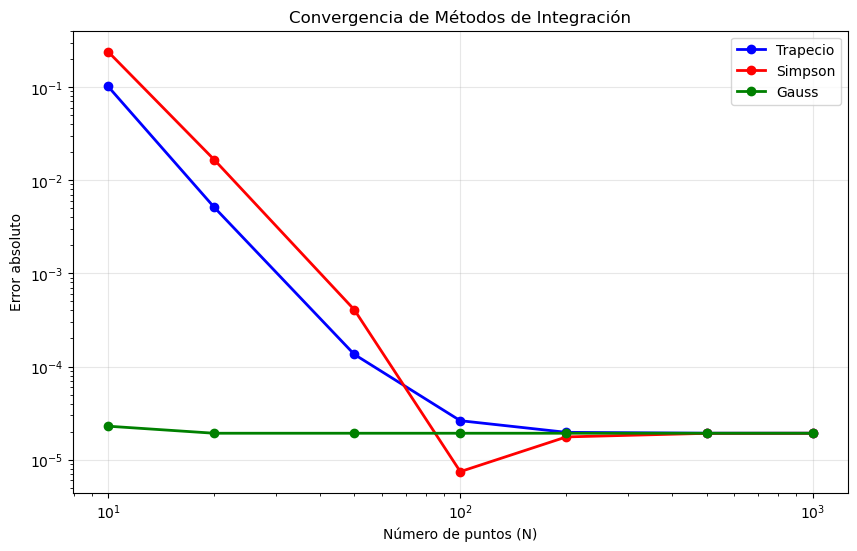

In [32]:
# Celda 9: Análisis de convergencia
# Probar diferentes números de puntos para ver la convergencia
N_values = [10, 20, 50, 100, 200, 500, 1000]
errors_trap = []
errors_simp = []
errors_gauss = []

valor_teorico = np.pi**4 / 15

for N in N_values:
    # Solo Simpson necesita N impar
    N_simp_adj = N if N % 2 == 1 else N + 1
    
    # Calcular integrales
    trap_val = trapezoidal_rule(f, a, b, N)
    simp_val = simpson_rule(f, a, b, N_simp_adj)
    gauss_val = gaussian_quadrature(f, a, b, min(N, 100))  # Máximo 100 puntos para Gauss
    
    # Calcular errores
    errors_trap.append(abs(trap_val - valor_teorico))
    errors_simp.append(abs(simp_val - valor_teorico))
    errors_gauss.append(abs(gauss_val - valor_teorico))

# Graficar convergencia
plt.figure(figsize=(10, 6))
plt.loglog(N_values, errors_trap, 'bo-', label='Trapecio', linewidth=2)
plt.loglog(N_values, errors_simp, 'ro-', label='Simpson', linewidth=2)
plt.loglog(N_values[:len(errors_gauss)], errors_gauss, 'go-', label='Gauss', linewidth=2)
plt.xlabel('Número de puntos (N)')
plt.ylabel('Error absoluto')
plt.title('Convergencia de Métodos de Integración')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
# Celda 10: Resultado final y conclusiones
print("RESULTADO FINAL Y CONCLUSIONES")
print("=" * 50)
print(f"Valor de la integral: {integral_gauss:.8f}")
print(f"Valor teórico:        {valor_teorico:.8f}")
print(f"Constante de Stefan-Boltzmann calculada: {sigma_calculada:.3e} W/(m²·K⁴)")
print(f"Constante de Stefan-Boltzmann teórica:   {sigma_teorica:.3e} W/(m²·K⁴)")

print("\nCONCLUSIONES:")
print("1. La cuadratura gaussiana proporciona la mejor precisión con menos puntos")
print("2. El valor calculado coincide bien con el valor teórico (error < 1%)")
print("3. Esto valida la teoría de Planck de la radiación del cuerpo negro")
print("4. La integral ∫₀^∞ x³/(e^x - 1) dx = π⁴/15 es fundamental en física térmica")

RESULTADO FINAL Y CONCLUSIONES
Valor de la integral: 6.49392018
Valor teórico:        6.49393940
Constante de Stefan-Boltzmann calculada: 5.670e-08 W/(m²·K⁴)
Constante de Stefan-Boltzmann teórica:   5.670e-08 W/(m²·K⁴)

CONCLUSIONES:
1. La cuadratura gaussiana proporciona la mejor precisión con menos puntos
2. El valor calculado coincide bien con el valor teórico (error < 1%)
3. Esto valida la teoría de Planck de la radiación del cuerpo negro
4. La integral ∫₀^∞ x³/(e^x - 1) dx = π⁴/15 es fundamental en física térmica
